# LEAD SCORING CASE STUDY

## 1: Importing and Reading Data.

In [1]:
# Supressing Warnings.

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Necessary Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the Dataset.

leads_data = pd.read_csv("Leads.csv")

## 2: Inspecting the Dataset.

In [4]:
# Let's see the head of the Dataframe.

leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe.

leads_data.shape

(9240, 37)

In [6]:
# Let's check the statistical aspects of the dataframe.

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's check the basic info of each column.

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As we can observe there are some columns in the dataset which have missing values.

## 3: Data Preparation.

- By observing the dataframe we can see that the columns `Prospect ID` and `Lead Number` are just a unique id through which the customer is identified. These won't be of any use in our analysis, so we can drop them.

In [8]:
# Dropping "Prospect ID" and "Lead Number" column.

leads_data.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

- Many of the categorical variables in the dataset have a level called `"Select"`, which means the customer had not selected this option while filling the form. This is as good as a null value because this does give any additional information. So we will replace it with `NaN` values.

In [9]:
# Replacing the level "Select" in categorical variables with NaN values.

leads_data = leads_data.replace("Select", np.nan)

In [10]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

- Many columns in the dataframe have High Percentage of missing values. It  is better to drop them as they would impact our analysis.

In [11]:
# Dropping columns with more than 40% missing values.

cols_to_drop = [cols for cols in leads_data.columns if((100*(leads_data[cols].isnull().sum()/len(leads_data.index))) >= 40)]

leads_data.drop(cols_to_drop, axis = 1, inplace = True)

In [12]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
# Let's see the value counts of "Country" column.

leads_data["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [14]:
# Let's see the value counts of "City" column.

leads_data["City"].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- Columns `"Country"` and `"City"`have High percentage of missing values and won't be useful in our analysis, so let's drop them.

In [15]:
# Dropping "Country" and "City" column.

leads_data.drop(["Country", "City"], axis = 1, inplace = True)

In [16]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [17]:
# Let's see the value counts of "Specialization" column.

leads_data["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
# Replacing NaN values in "Specialization" column with a new category "Not Provided".

leads_data["Specialization"] = leads_data["Specialization"].replace(np.nan, "Not Provided")

In [19]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [20]:
# Let's see the value counts of "What is your current occupation" column.

leads_data["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
# Replacing NaN values in "What is your current occupation" column with the Mode value in the column.

leads_data["What is your current occupation"] = leads_data["What is your current occupation"].replace(np.nan, "Unemployed")

In [22]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [23]:
# Let's see the value counts of "What matters most to you in choosing a course" column.

leads_data["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# Replacing NaN values in "What matters most to you in choosing a course" column with the Mode value in the column.

leads_data["What matters most to you in choosing a course"] = leads_data["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prospects")

In [25]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [26]:
# Let's see the value counts of "Tags" column.

leads_data["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
# Replacing NaN values in "Tags" column with a new category "Not Provided".

leads_data["Tags"] = leads_data["Tags"].replace(np.nan, "Not Provided")

In [28]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

- Dropping all the Rows having NaN values since they are less than 2% in a few columns and dropping them won't affect our Analysis.

In [29]:
# Dropping Rows having NaN values.

leads_data = leads_data[~pd.isnull(leads_data["Lead Source"])]
leads_data = leads_data[~pd.isnull(leads_data["TotalVisits"])]
leads_data = leads_data[~pd.isnull(leads_data["Page Views Per Visit"])]
leads_data = leads_data[~pd.isnull(leads_data["Last Activity"])]

In [30]:
# Checking the percentage of missing values in each column.

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

- **We have dealt with all the missing values in the Columns.**

In [31]:
# Let's see the value counts of "Do Not Call" column.

leads_data["Do Not Call"].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [32]:
# Let's see the value counts of "What matters most to you in choosing a course" column.

leads_data["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
# Let's see the value counts of "Search" column.

leads_data["Search"].value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [34]:
# Let's see the value counts of "Magazine" column.

leads_data["Magazine"].value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

In [35]:
# Let's see the value counts of "Newspaper Article" column.

leads_data["Newspaper Article"].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [36]:
# Let's see the value counts of "X Education Forums" column.

leads_data["X Education Forums"].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [37]:
# Let's see the value counts of "Newspaper" column.

leads_data["Newspaper"].value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [38]:
# Let's see the value counts of "Digital Advertisement" column.

leads_data["Digital Advertisement"].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [39]:
# Let's see the value counts of "Through Recommendations" column.

leads_data["Through Recommendations"].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [40]:
# Let's see the value counts of "Receive More Updates About Our Courses" column.

leads_data["Receive More Updates About Our Courses"].value_counts(dropna=False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [41]:
# Let's see the value counts of "Update me on Supply Chain Content" column.

leads_data["Update me on Supply Chain Content"].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [42]:
# Let's see the value counts of "Get updates on DM Content" column.

leads_data["Get updates on DM Content"].value_counts(dropna=False)

No    9074
Name: Get updates on DM Content, dtype: int64

In [43]:
# Let's see the value counts of "I agree to pay the amount through cheque" column.

leads_data["I agree to pay the amount through cheque"].value_counts(dropna=False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

- The value counts of all the above columns, shows us that there is a particular level representing the categorical variables majorly. These include columns namely "Do Not Call", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content" and "I agree to pay the amount through cheque". We can drop these columns as they won't help with our analysis.

In [44]:
# Dropping columns

cols = ["Do Not Call", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]

leads_data.drop(cols, axis = 1, inplace = True)

In [45]:
# Checking the basic info of the dataframe.

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

#### Checking For Outliers in Numerical columns.

In [46]:
# Numerical columns to check for outliers.

Num_leads_data = leads_data[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]

In [47]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%.

Num_leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [48]:
# Custom function to treat outliers. Capping and Flooring Method.

def Outlier_Treatment(column_name):
    Q1=leads_data[[column_name]].describe().loc["25%"][column_name]
    Q3=leads_data[[column_name]].describe().loc["75%"][column_name]
    IQR=Q3-Q1
    Upper_Bound=Q3+1.5*IQR
    Lower_Bound=Q1-1.5*IQR
    leads_data[column_name]=np.where(leads_data[column_name]>Upper_Bound,Upper_Bound,leads_data[column_name])
    leads_data[column_name]=np.where(leads_data[column_name]<Lower_Bound,Lower_Bound,leads_data[column_name])
    return

In [49]:
# Capping and Flooring the outliers.

for col in ["TotalVisits", "Page Views Per Visit"]:
    Outlier_Treatment(col)

- We have used the Capping and Flooring method to deal with the outliers. It means that any value beyond the Upper bound would be given the same value as the Upper bound value, and similarly any value below the Lower bound will be giiven the value of Lower Bound.

## 4: EDA.

### UNIVARIATE ANALYSIS:

#### CountPlot Analysis for Categorical Variables.

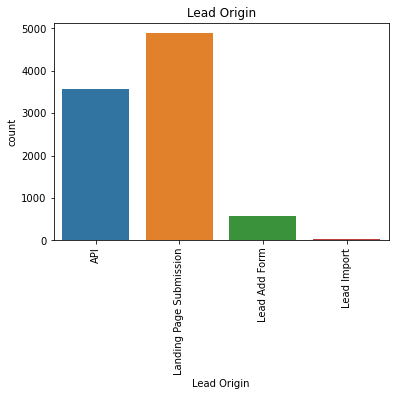

In [50]:
# CountPlot for "Lead Origin".

sns.countplot(leads_data["Lead Origin"])
plt.xticks(rotation=90)
plt.title("Lead Origin")
plt.show()

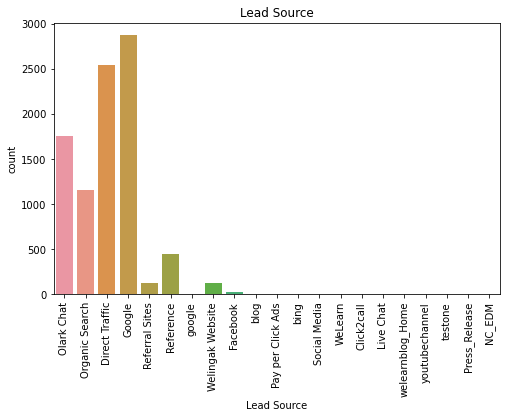

In [51]:
# CountPlot for "Lead Source".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Lead Source"])
plt.xticks(rotation=90)
plt.title("Lead Source")
plt.show()

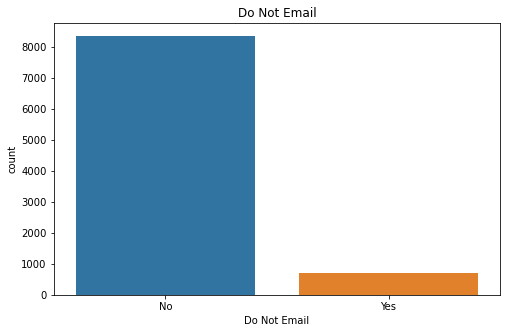

In [52]:
# CountPlot for "Do Not Email".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Do Not Email"])
plt.title("Do Not Email")
plt.show()

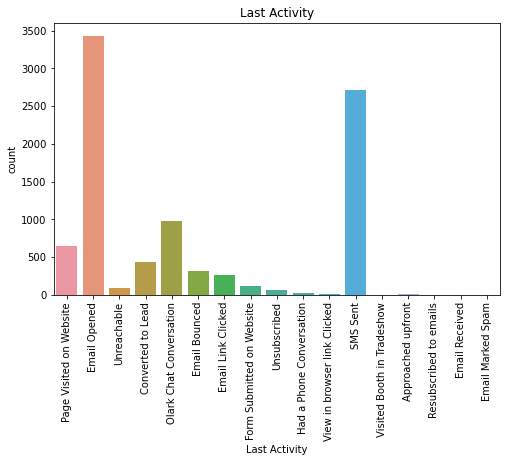

In [53]:
# CountPlot for "Last Activity".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Last Activity"])
plt.xticks(rotation=90)
plt.title("Last Activity")
plt.show()

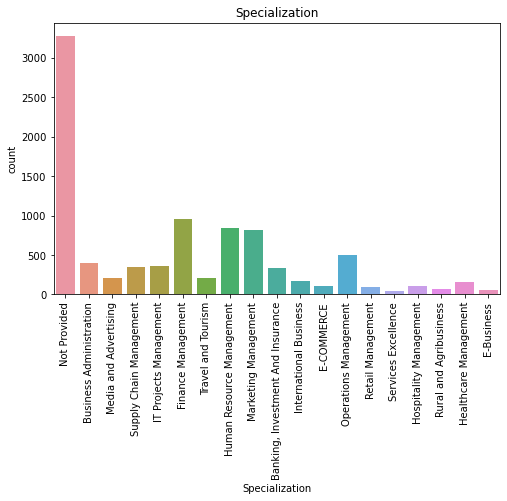

In [54]:
# CountPlot for "Specialization".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Specialization"])
plt.xticks(rotation=90)
plt.title("Specialization")
plt.show()

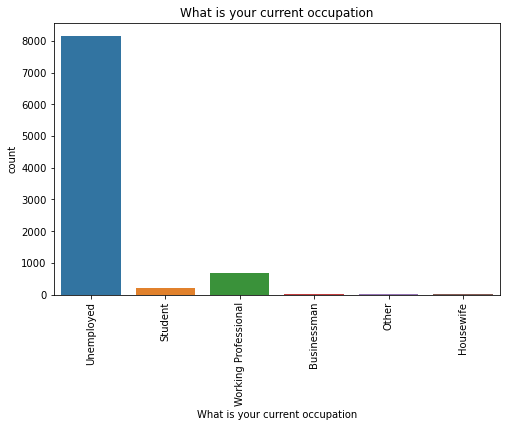

In [55]:
# CountPlot for "What is your current occupation".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["What is your current occupation"])
plt.xticks(rotation=90)
plt.title("What is your current occupation")
plt.show()

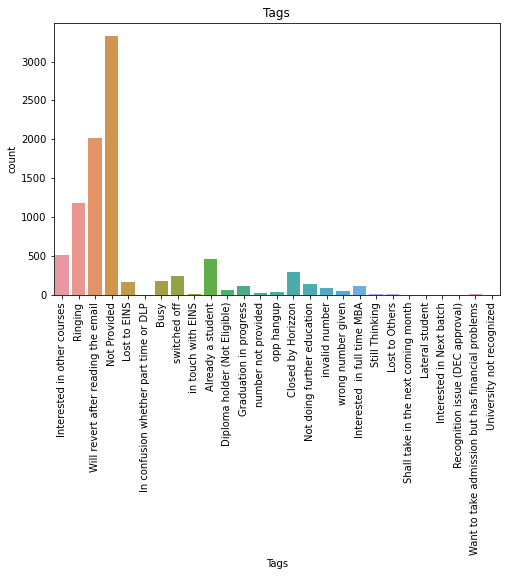

In [56]:
# CountPlot for "Tags".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Tags"])
plt.xticks(rotation=90)
plt.title("Tags")
plt.show()

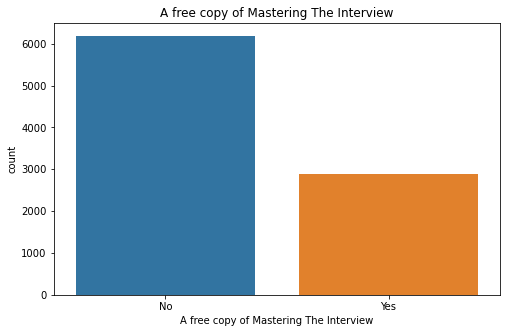

In [57]:
# CountPlot for "A free copy of Mastering The Interview".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["A free copy of Mastering The Interview"])
plt.title("A free copy of Mastering The Interview")
plt.show()

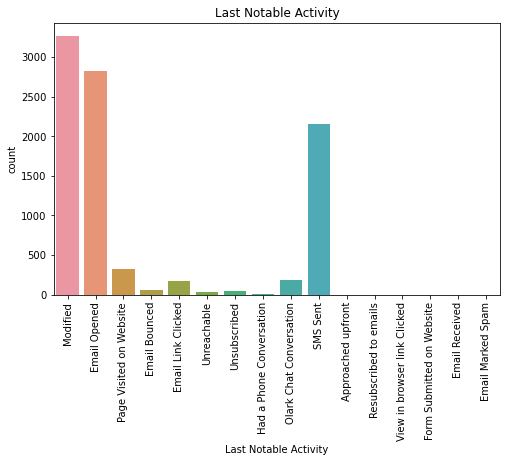

In [58]:
# CountPlot for "Last Notable Activity".

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Last Notable Activity"])
plt.xticks(rotation=90)
plt.title("Last Notable Activity")
plt.show()

#### Analysis for Numerical Variables.

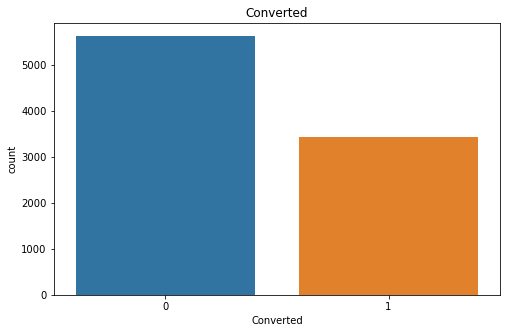

In [59]:
# CountPlot for "Converted" (Target Variable).

plt.figure(figsize = (8,5))
sns.countplot(leads_data["Converted"])
plt.title("Converted")
plt.show()

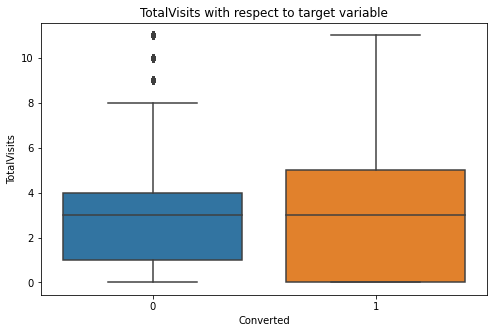

In [60]:
# Boxplot for "TotalVisits" with respect to Target variable.

plt.figure(figsize = (8,5))
sns.boxplot(data = leads_data, x = "Converted", y = "TotalVisits")
plt.title("TotalVisits with respect to target variable")
plt.show()

- The Median of `TotalVisits` for both non-converted leads as well as converted leads is same around 3.
   
- The Maximum value of `TotalVisits` for converted leads is higher than that of non-converted leads.

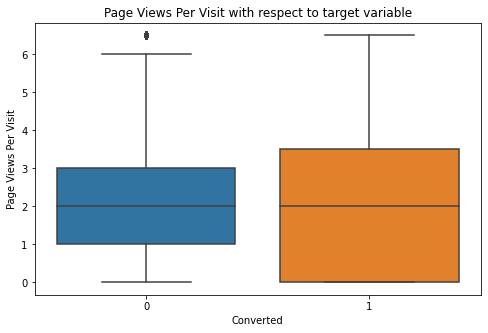

In [61]:
# Boxplot for "Page Views Per Visit" with respect to target variable.

plt.figure(figsize = (8,5))
sns.boxplot(data = leads_data, x = "Converted", y = "Page Views Per Visit")
plt.title("Page Views Per Visit with respect to target variable")
plt.show()

- The Median Number of `Page Views Per Visit` for both non-converted leads as well as converted leads is 2.

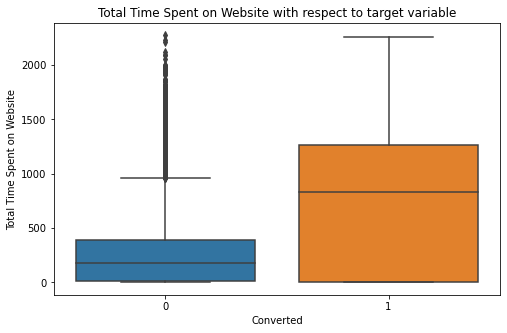

In [62]:
# Boxplot for "Total Time Spent on Website" with respect to target variable.

plt.figure(figsize = (8,5))
sns.boxplot(data = leads_data, x = "Converted", y = "Total Time Spent on Website")
plt.title("Total Time Spent on Website with respect to target variable")
plt.show()

### Plotting the Variables with Hue = "Converted".

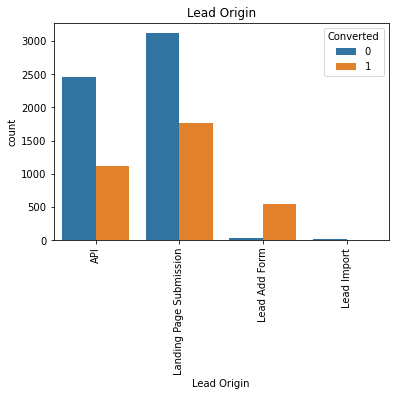

In [63]:
# Countplot for "Lead Origin" with Hue = "Coverted".

sns.countplot(data = leads_data, x = "Lead Origin", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Lead Origin")
plt.show()

- `API` and `Landing Page Submission` are the Lead Origins that generate the most leads as well as converted leads.
   
- Total Leads from `Lead Add Form` are very less in number but there is a higher conversion rate there.

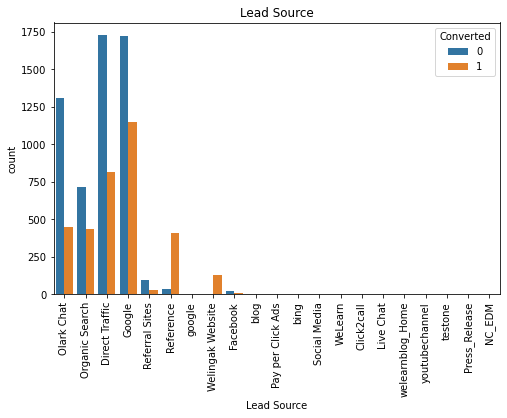

In [64]:
# Countplot for "Lead Source" with Hue = "Coverted".

plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "Lead Source", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Lead Source")
plt.legend(title = "Converted", loc = "upper right")
plt.show()

- Total number of leads generated by `Direct Traffic` and `Google` are the highest. They also have the highest converted leads.
   
- Leads through `Reference` are low in number, but they have a higher conversion rate.
    
- Numbers of leads from `Olark Chat` and `Organic Search` are high, but their conversion rates are low.

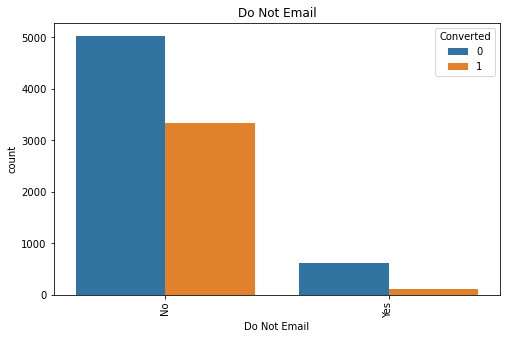

In [65]:
# Countplot for "Do Not Email" with Hue = "Coverted".

plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "Do Not Email", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Do Not Email")
plt.show()

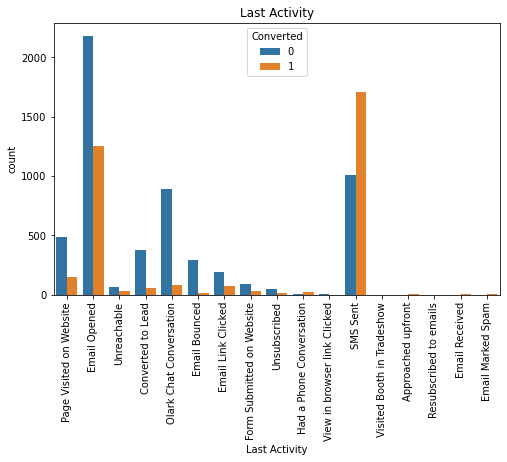

In [66]:
# Countplot for "Last Activity" with Hue = "Coverted".

plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "Last Activity", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Last Activity")
plt.show()

- Customers whose Last Activity was either `Email Opened` or `SMS Sent` have a high chance of being turned to converted leads.

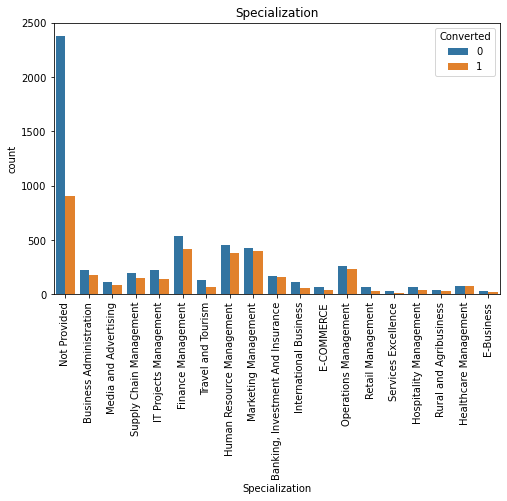

In [67]:
# Countplot for "Specialization" with Hue = "Coverted".

plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "Specialization", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Specialization")
plt.show()

- Specialization having different type of Management in them are the ones having high number of leads as well as converted leads.

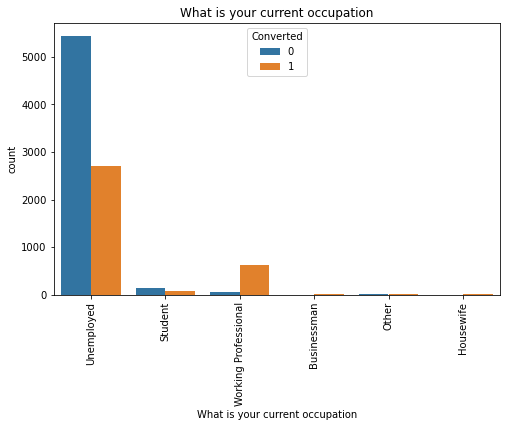

In [68]:
# Countplot for "What is your current occupation" with Hue = "Coverted".

plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "What is your current occupation", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("What is your current occupation")
plt.show()

- `Unemployed` leads are highest in number. They also have the highest converted leads as well.
   
- `Working Professional` are low in number, but they have a high conversion rate.

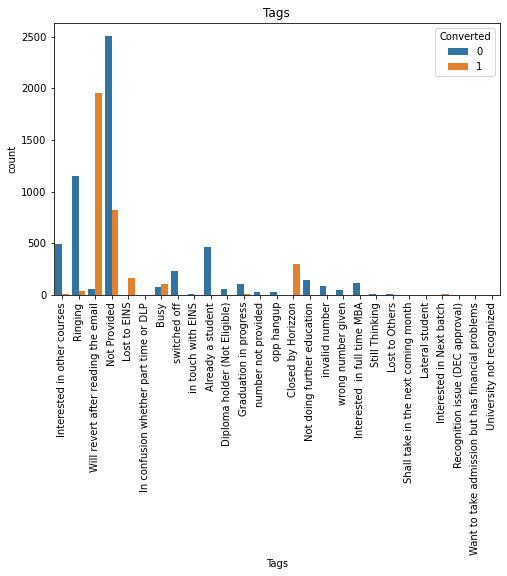

In [69]:
# Countplot for "Tags" with Hue = "Coverted".

plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "Tags", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Tags")
plt.legend(title = "Converted", loc = "upper right")
plt.show()

- Customers whose current status is `"Will revert after reading the email"` are most likely turned to converted leads. 

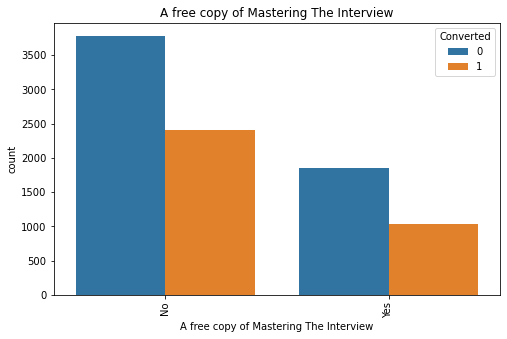

In [70]:
# Countplot for "A free copy of Mastering The Interview" with Hue = "Coverted".

plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "A free copy of Mastering The Interview", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("A free copy of Mastering The Interview")
plt.show()

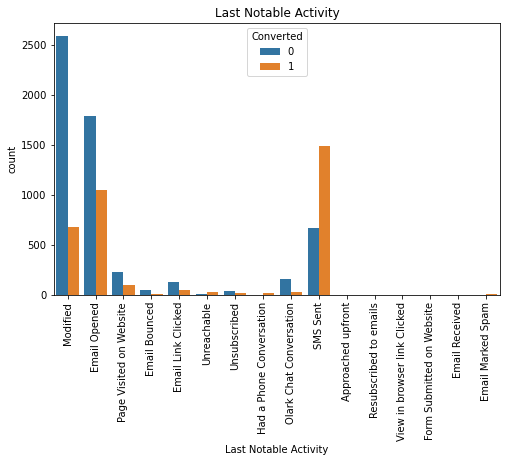

In [71]:
# Countplot for "Last Notable Activity" with Hue = "Coverted".

plt.figure(figsize = (8,5))
sns.countplot(data = leads_data, x = "Last Notable Activity", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Last Notable Activity")
plt.show()

- Customers whose Last Notable Activity was either `Email Opened` or `SMS Sent` are having high number of leads. They also have higher converted leads.
   
- Customers having `Modified` as their Last Notable Activity have a very low conversion rate.

### MULTIVARIATE ANALYSIS.

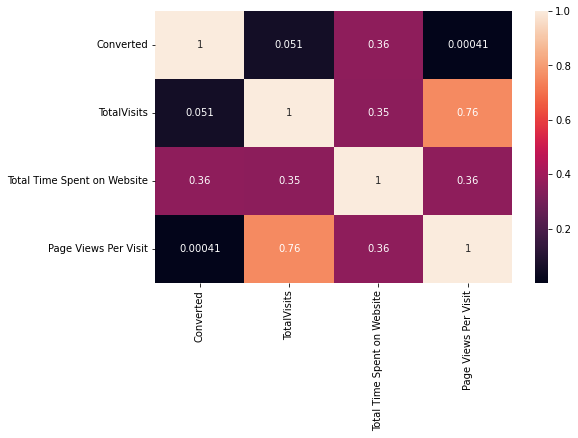

In [72]:
# Correlation HeatMap.

plt.figure(figsize = (8,5))
sns.heatmap(leads_data.corr(), annot=True)
plt.show()

<Figure size 720x360 with 0 Axes>

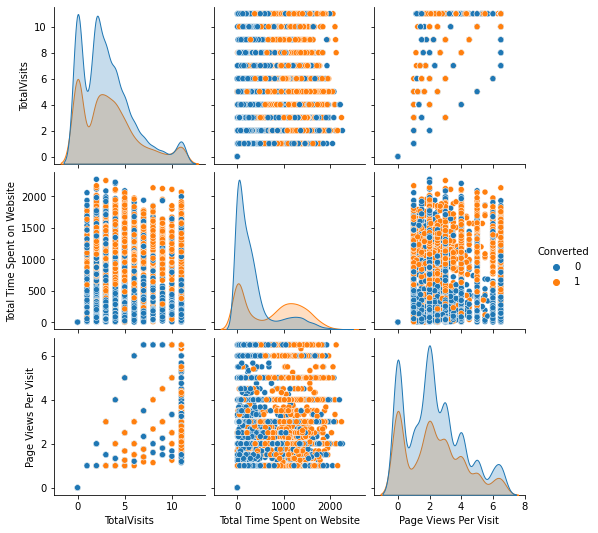

In [73]:
# Pairplots

plt.figure(figsize = (10,5))
sns.pairplot(data = leads_data, hue="Converted")
plt.show()

## 5: Dummy Variable Creation.

In [74]:
# Checking the datatype of columns.

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [75]:
# List of variables to map.

variablelist =  ["A free copy of Mastering The Interview", "Do Not Email"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[variablelist] = leads_data[variablelist].apply(binary_map)

In [76]:
# Creating dummy variables for the categorical variables.

dummy1 = pd.get_dummies(leads_data[["Lead Origin","What is your current occupation"]], drop_first=True)

# Adding Dummies to the main Dataframe.
leads_data = pd.concat([leads_data,dummy1], axis = 1)

In [77]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

sp = pd.get_dummies(leads_data["Specialization"], prefix  = "Specialization")
sp = sp.drop(["Specialization_Not Provided"], axis = 1)
leads_data = pd.concat([leads_data, sp], axis = 1)

ls = pd.get_dummies(leads_data["Lead Source"], prefix  = "Lead Source")
ls = ls.drop(["Lead Source_welearnblog_Home"], axis = 1)
leads_data = pd.concat([leads_data, ls], axis = 1)

la = pd.get_dummies(leads_data["Last Activity"], prefix  = "Last Activity")
la = la.drop(["Last Activity_View in browser link Clicked"], axis = 1)
leads_data = pd.concat([leads_data, la], axis = 1)

lna = pd.get_dummies(leads_data["Last Notable Activity"], prefix  = "Last Notable Activity")
lna = lna.drop(["Last Notable Activity_View in browser link Clicked"], axis = 1)
leads_data = pd.concat([leads_data, lna], axis = 1)

tg = pd.get_dummies(leads_data["Tags"], prefix  = "Tags")
tg = tg.drop(["Tags_Want to take admission but has financial problems"], axis = 1)
leads_data = pd.concat([leads_data, tg], axis = 1)

In [78]:
# We have created dummies for the below variables, so we can drop them.

cols_drop = ["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation", "Tags", "Last Notable Activity"]
leads_data.drop(cols_drop, axis = 1, inplace = True)

In [79]:
# Checking the head of the dataframe.

leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 6: Train-Test Split.

In [80]:
# Importing necessary libraries.

from sklearn.model_selection import train_test_split

In [81]:
# Putting feature variables to X.

X = leads_data.drop(["Converted"], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
# Putting target variable to y.

y = leads_data["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Splitting into train and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 7: Feature Scaling.

In [84]:
# Importing necessary libraries.

from sklearn.preprocessing import StandardScaler

In [85]:
# Scaling the variables.

scaler = StandardScaler()

Num_cols = ["TotalVisits", "Total Time Spent on Website","Page Views Per Visit"]

X_train[Num_cols] = scaler.fit_transform(X_train[Num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
3009,0,-0.431325,-0.160255,-0.161929,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.431325,-0.540048,-0.161929,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.124566,-0.888650,-1.247280,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4750,0,-0.431325,1.643304,-0.161929,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,0,0.608537,2.017593,0.109409,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 8 : Model Building.

In [86]:
# Importing Libraries.

import statsmodels.api as sm

In [87]:
# Importing and Running RFE with 15 variables as output.

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [88]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
        True, False,  True, False, False,  True, False,  True, False,
       False, False,  True, False,  True,  True, False,  True,  True])

In [89]:
# list of all the features.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 40),
 ('A free copy of Mastering The Interview', False, 58),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', False, 6),
 ('Lead Origin_Lead Import', False, 42),
 ('What is your current occupation_Housewife', False, 56),
 ('What is your current occupation_Other', False, 35),
 ('What is your current occupation_Student', False, 18),
 ('What is your current occupation_Unemployed', False, 17),
 ('What is your current occupation_Working Professional', False, 43),
 ('Specialization_Banking, Investment And Insurance', False, 24),
 ('Specialization_Business Administration', False, 77),
 ('Specialization_E-Business', False, 85),
 ('Specialization_E-COMMERCE', False, 26),
 ('Specialization_Finance Management', False, 65),
 ('Specialization_Healthcare Management', False, 86),
 ('Specialization_Hospitality Management', False, 80),

In [90]:
# Columns selected by RFE for model building.

cols = X_train.columns[rfe.support_]

In [91]:
# Columns not selected.

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Manag

In [92]:
# Building Model 1.

X_train_sm = sm.add_constant(X_train[cols])
log_M1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_M1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1369.4
Date:                Mon, 13 Jun 2022   Deviance:                       2738.8
Time:                        22:30:35   Pearson chi2:                 1.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3565      0.072    -18.815      0.000      -1.498      -1.215
Lead Source_Welingak Website                 4.4179      0.743      5.949      0.000       2.962       5.873
Last Activity_SMS Sent                       2.2136      0.108     20.410      0.000       2.001       2.426
Last Notable Activity_Modified              -1.9293      0.123    -15.700      0.000      -2.170      -1.688
Tags_Already a student                      -3.2162      0.713     -4.508      0.000      -4.615      -1.818
Tags_Closed by Horizzon                      7.3136      0.721     10.140      0.000       5.900       8.727
Tags_Diploma holder (Not Eligible)          -2.2868      1.031     -2.218      0.027      -4.307      -0.266
Tags_Interested in other courses            -1.4455      0.325     -4.451      0.000      -2.082      -0.809
Tags_Lost to EINS                            6.5621      0.727      9.029      0.000       5.138       7.987
Tags_Not doing further education            -2.7189      1.026     -2.650      0.008      -4.730      -0.708
Tags_Ringing                                -3.5729      0.243    -14.683      0.000      -4.050      -3.096
Tags_Will revert after reading the email     5.0561      0.193     26.135      0.000       4.677       5.435
Tags_invalid number                        -25.2205   2.52e+04     -0.001      0.999   -4.95e+04    4.94e+04
Tags_number not provided                   -25.1747   4.39e+04     -0.001      1.000    -8.6e+04     8.6e+04
Tags_switched off                           -3.6815      0.520     -7.079      0.000      -4.701      -2.662
Tags_wrong number given                    -25.1733   3.41e+04     -0.001      0.999   -6.68e+04    6.68e+04
============================================================================================================
"""

In [93]:
# Dropping feature with high p-value.

cols = cols.drop("Tags_number not provided", 1)

In [94]:
# Building Model 2.

X_train_sm = sm.add_constant(X_train[cols])
log_M2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_M2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1378.6
Date:                Mon, 13 Jun 2022   Deviance:                       2757.2
Time:                        22:30:35   Pearson chi2:                 1.09e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3697      0.072    -19.009      0.000      -1.511      -1.228
Lead Source_Welingak Website                 4.4303      0.742      5.971      0.000       2.976       5.884
Last Activity_SMS Sent                       2.1901      0.108     20.337      0.000       1.979       2.401
Last Notable Activity_Modified              -1.9091      0.123    -15.582      0.000      -2.149      -1.669
Tags_Already a student                      -3.2049      0.713     -4.492      0.000      -4.603      -1.807
Tags_Closed by Horizzon                      7.3094      0.721     10.135      0.000       5.896       8.723
Tags_Diploma holder (Not Eligible)          -2.2718      1.030     -2.205      0.027      -4.291      -0.252
Tags_Interested in other courses            -1.4331      0.324     -4.418      0.000      -2.069      -0.797
Tags_Lost to EINS                            6.5587      0.727      9.027      0.000       5.135       7.983
Tags_Not doing further education            -2.7027      1.025     -2.636      0.008      -4.712      -0.693
Tags_Ringing                                -3.5403      0.243    -14.574      0.000      -4.016      -3.064
Tags_Will revert after reading the email     5.0607      0.193     26.208      0.000       4.682       5.439
Tags_invalid number                        -24.1898   1.53e+04     -0.002      0.999      -3e+04       3e+04
Tags_switched off                           -3.6475      0.520     -7.017      0.000      -4.666      -2.629
Tags_wrong number given                    -24.1424   2.07e+04     -0.001      0.999   -4.06e+04    4.06e+04
============================================================================================================
"""

In [95]:
# Dropping feature with high p-value.

cols = cols.drop("Tags_invalid number", 1)

In [96]:
# Building Model 3.

X_train_sm = sm.add_constant(X_train[cols])
log_M3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_M3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1406.6
Date:                Mon, 13 Jun 2022   Deviance:                       2813.2
Time:                        22:30:35   Pearson chi2:                 1.03e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4068      0.072    -19.553      0.000      -1.548      -1.266
Lead Source_Welingak Website                 4.4686      0.740      6.038      0.000       3.018       5.919
Last Activity_SMS Sent                       2.1171      0.106     20.065      0.000       1.910       2.324
Last Notable Activity_Modified              -1.8558      0.122    -15.270      0.000      -2.094      -1.618
Tags_Already a student                      -3.1724      0.713     -4.447      0.000      -4.571      -1.774
Tags_Closed by Horizzon                      7.3010      0.721     10.128      0.000       5.888       8.714
Tags_Diploma holder (Not Eligible)          -2.2278      1.028     -2.166      0.030      -4.243      -0.212
Tags_Interested in other courses            -1.3961      0.323     -4.318      0.000      -2.030      -0.762
Tags_Lost to EINS                            6.5527      0.726      9.024      0.000       5.129       7.976
Tags_Not doing further education            -2.6546      1.023     -2.594      0.009      -4.660      -0.649
Tags_Ringing                                -3.4431      0.242    -14.242      0.000      -3.917      -2.969
Tags_Will revert after reading the email     5.0767      0.192     26.426      0.000       4.700       5.453
Tags_switched off                           -3.5460      0.519     -6.831      0.000      -4.564      -2.529
Tags_wrong number given                    -23.0501   1.26e+04     -0.002      0.999   -2.47e+04    2.47e+04
============================================================================================================
"""

In [97]:
# Dropping feature with high p-value.

cols = cols.drop("Tags_wrong number given", 1)

In [98]:
# Building Model 4.

X_train_sm = sm.add_constant(X_train[cols])
log_M4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_M4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.5
Date:                Mon, 13 Jun 2022   Deviance:                       2841.0
Time:                        22:30:35   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4196      0.072    -19.738      0.000      -1.561      -1.279
Lead Source_Welingak Website                 4.4876      0.739      6.070      0.000       3.039       5.937
Last Activity_SMS Sent                       2.0747      0.104     19.859      0.000       1.870       2.280
Last Notable Activity_Modified              -1.8413      0.121    -15.215      0.000      -2.079      -1.604
Tags_Already a student                      -3.1593      0.713     -4.429      0.000      -4.558      -1.761
Tags_Closed by Horizzon                      7.3020      0.721     10.131      0.000       5.889       8.715
Tags_Diploma holder (Not Eligible)          -2.2082      1.028     -2.149      0.032      -4.222      -0.194
Tags_Interested in other courses            -1.3779      0.323     -4.268      0.000      -2.011      -0.745
Tags_Lost to EINS                            6.5551      0.726      9.029      0.000       5.132       7.978
Tags_Not doing further education            -2.6309      1.023     -2.573      0.010      -4.635      -0.627
Tags_Ringing                                -3.3953      0.241    -14.077      0.000      -3.868      -2.923
Tags_Will revert after reading the email     5.0865      0.192     26.528      0.000       4.711       5.462
Tags_switched off                           -3.4957      0.519     -6.738      0.000      -4.513      -2.479
============================================================================================================
"""

In [99]:
# Importing libraries.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
# Creating a dataframe containing the names of all the feature variables and their respective VIF values.

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.04
0,Lead Source_Welingak Website,1.03
7,Tags_Lost to EINS,1.03
8,Tags_Not doing further education,1.03
11,Tags_switched off,1.03
5,Tags_Diploma holder (Not Eligible),1.01
6,Tags_Interested in other courses,0.34
3,Tags_Already a student,0.18
10,Tags_Will revert after reading the email,0.14
2,Last Notable Activity_Modified,0.13


In [101]:
# Dropping feature with relatively high p-value.

cols = cols.drop("Tags_Diploma holder (Not Eligible)", 1)

In [102]:
# Building Model 5.

X_train_sm = sm.add_constant(X_train[cols])
log_M5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_M5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1425.2
Date:                Mon, 13 Jun 2022   Deviance:                       2850.5
Time:                        22:30:36   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4433      0.072    -20.134      0.000      -1.584      -1.303
Lead Source_Welingak Website                 4.5077      0.740      6.095      0.000       3.058       5.957
Last Activity_SMS Sent                       2.0919      0.104     20.047      0.000       1.887       2.296
Last Notable Activity_Modified              -1.8441      0.121    -15.248      0.000      -2.081      -1.607
Tags_Already a student                      -3.1363      0.713     -4.396      0.000      -4.534      -1.738
Tags_Closed by Horizzon                      7.3277      0.721     10.167      0.000       5.915       8.740
Tags_Interested in other courses            -1.3575      0.323     -4.203      0.000      -1.990      -0.724
Tags_Lost to EINS                            6.5803      0.726      9.063      0.000       5.157       8.003
Tags_Not doing further education            -2.6125      1.023     -2.554      0.011      -4.617      -0.608
Tags_Ringing                                -3.3859      0.241    -14.035      0.000      -3.859      -2.913
Tags_Will revert after reading the email     5.1097      0.192     26.646      0.000       4.734       5.486
Tags_switched off                           -3.4873      0.519     -6.722      0.000      -4.504      -2.470
============================================================================================================
"""

In [103]:
# Creating a dataframe containing the names of all the feature variables and their respective VIF values.

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.04
0,Lead Source_Welingak Website,1.03
6,Tags_Lost to EINS,1.03
7,Tags_Not doing further education,1.03
10,Tags_switched off,1.03
5,Tags_Interested in other courses,0.34
3,Tags_Already a student,0.18
9,Tags_Will revert after reading the email,0.14
2,Last Notable Activity_Modified,0.13
1,Last Activity_SMS Sent,0.12


- Now we have low `p-values` for all the features and also the `VIFs` for all the features are very low.
   
- `Model 5` can be condsidered as our final model.

In [104]:
# Predicted values on the train set.

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.1910307 , 0.1910307 , 0.01013717, 0.65669385, 0.99543523,
       0.99685358, 0.1910307 , 0.65669385, 0.97506951, 0.01013717])

In [105]:
# Creating y_train_pred_final df.

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.191031,3009
1,0,0.191031,1012
2,0,0.010137,9226
3,1,0.656694,4750
4,1,0.995435,7987


In [106]:
# Creating new column 'Predicted' with 1 if Converted_prob > 0.5 else 0.

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.191031,3009,0
1,0,0.191031,1012,0
2,0,0.010137,9226,0
3,1,0.656694,4750,1
4,1,0.995435,7987,1


In [107]:
# Importing Libraries.

from sklearn import metrics

In [108]:
# Creating a confusion matrix. 

Confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(Confusion)

[[3721  184]
 [ 316 2130]]


In [109]:
# Let's check the overall accuracy score.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9212722405920327


### Metrics beyond simply accuracy

In [110]:
# Creating TP, TN, FP, FN.

TP = Confusion[1,1] # True Positive 
TN = Confusion[0,0] # True Negative
FP = Confusion[0,1] # False Positive
FN = Confusion[1,0] # False Negative

In [111]:
# Let's check the sensitivity.

TP / float(TP+FN)

0.8708094848732625

In [112]:
# Let's check the specificity.

TN / float(TN+FP)

0.9528809218950064

In [113]:
# Let's check the False Positive Rate - predicting customer as converted lead when the customer has not actually converted.

print(FP/ float(TN+FP))

0.0471190781049936


## 9: Plotting ROC Curve.

In [114]:
# ROC Curve function.

def draw_ROC(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

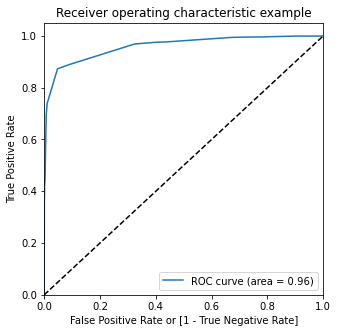

In [116]:
# Plotting ROC Curve.

draw_ROC(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- A Good ROC curve is the one which touches the upper left corner of the graph. we have a similar curve over here.
   
- Higher the area under the ROC curve the better is your model. The value of ROC curve should be closer to 1, we have the area under ROC curve = 0.96.

## 10. Finding Optimal Cutoff Point.

In [117]:
# Creating columns with different probability cutoffs. 

Numbers = [float(x)/10 for x in range(10)]
for i in Numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.191031,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.191031,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.010137,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.656694,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.995435,7987,1,1,1,1,1,1,1,1,1,1,1


In [118]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_data = pd.DataFrame(columns = ["prob","accuracy","sensi","speci"])
from sklearn.metrics import confusion_matrix

Num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in Num:
    CM_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(CM_1))
    accuracy = (CM_1[0,0]+CM_1[1,1])/total1
    
    speci = CM_1[0,0]/(CM_1[0,0]+CM_1[0,1])
    sensi = CM_1[1,1]/(CM_1[1,0]+CM_1[1,1])
    cutoff_data.loc[i] =[i ,accuracy,sensi,speci]
print(cutoff_data)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.788380  0.968929  0.675288
0.2   0.2  0.901275  0.890025  0.908323
0.3   0.3  0.921902  0.872854  0.952625
0.4   0.4  0.921272  0.870809  0.952881
0.5   0.5  0.921272  0.870809  0.952881
0.6   0.6  0.921272  0.870809  0.952881
0.7   0.7  0.892930  0.738757  0.989501
0.8   0.8  0.892615  0.737939  0.989501
0.9   0.9  0.876555  0.690515  0.993086


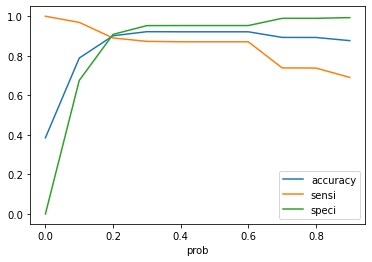

In [119]:
# Plotting accuracy, sensitivity and specificity for various probabilities.

cutoff_data.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the above plot we can see that the optimal cutoff point to take is around 0.2.

In [120]:
# Creating final_predicted column with 0.2 cutoff point.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.191031,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.191031,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.010137,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.656694,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.995435,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [121]:
# Assigning Score to leads.

y_train_pred_final["Lead Score"] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final[["Converted","Converted_prob","Prospect ID","final_predicted","Lead Score"]].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead Score
0,0,0.191031,3009,0,19
1,0,0.191031,1012,0,19
2,0,0.010137,9226,0,1
3,1,0.656694,4750,1,66
4,1,0.995435,7987,1,100


In [122]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9012753897024091

- Our accuracy dropped a little when compare to the earlier accuracy score.

In [123]:
# Creating Confusion matrix 2.

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2

array([[3547,  358],
       [ 269, 2177]], dtype=int64)

In [124]:
# Creating TP, TN, FP, FN.

TP = confusion_2[1,1]
TN = confusion_2[0,0]
FP = confusion_2[0,1]
FN = confusion_2[1,0]

In [125]:
# Let's check the sensitivity.

TP / float(TP+FN)

0.8900245298446443

In [126]:
# Let's check the specificity.

TN / float(TN+FP)

0.9083226632522408

- From the Final Model (Model 5) we built we have the following observation values:
    - Accuracy : 90%
    - Sensitivity : 89%
    - Specificity : 91%
- These values show that the model is performing very well.

In [127]:
# Let's check the False Positive Rate - predicting customer as converted lead when the customer has not actually converted.

print(FP/ float(TN+FP))

0.09167733674775928


In [128]:
# Positive predictive value.

print (TP / float(TP+FP))

0.8587771203155818


In [129]:
# Negative predictive value.

print (TN / float(TN+ FN))

0.9295073375262054


### Precision and Recall.

- Using sklearn to get the precision and recall values.

In [130]:
# Importing Libraries.

from sklearn.metrics import precision_score, recall_score

In [131]:
# Precision Score.

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8587771203155818

In [132]:
# Recall Score.

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8900245298446443

#### Precision and Recall Tradeoff.

In [133]:
# Importing Libraries.

from sklearn.metrics import precision_recall_curve

In [134]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

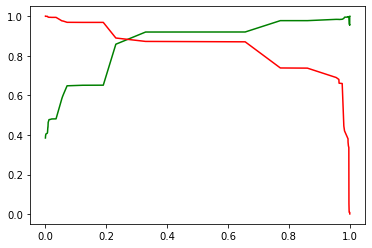

In [135]:
# Plotting the curve.

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 11: Making Predictions on the Test data.

In [136]:
# Scaling the variables.

X_test[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]] = scaler.transform(X_test[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]])

In [137]:
X_test = X_test[cols]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
3271,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0,0,0,0,0,0,0,1,0
7936,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,1,0,1,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,0,0,0


In [138]:
X_test_sm = sm.add_constant(X_test)

In [139]:
# Creating the y_test_pred.

y_test_pred = res.predict(X_test_sm)

In [140]:
# Checking the y_test_pred head.

y_test_pred[:10]

3271    0.191031
1490    0.975070
7936    0.191031
4216    0.982712
3830    0.191031
1800    0.975070
6507    0.060808
4821    0.007170
4223    0.996854
4714    0.232282
dtype: float64

In [141]:
# Converting y_test_pred to a dataframe.

y_test_pred_df = pd.DataFrame(y_test_pred)

In [142]:
# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

In [143]:
# Alloting and resetting index.

y_test_df["Prospect ID"] = y_test_df.index

y_test_pred_df.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [144]:
# Appending y_test_df and y_test_pred_df.

y_pred_final = pd.concat([y_test_df, y_test_pred_df], axis = 1)

In [145]:
# Checking y_pred_final head.

y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.191031
1,1,1490,0.975070
2,0,7936,0.191031
3,1,4216,0.982712
4,0,3830,0.191031


In [146]:
# Renaming the column 0 to Converted_prob.

y_pred_final = y_pred_final.rename(columns = { 0 : "Converted_prob"})

In [147]:
# Checking y_pred_final head.

y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.191031
1,1,1490,0.975070
2,0,7936,0.191031
3,1,4216,0.982712
4,0,3830,0.191031


In [148]:
# Getting the final_predicted values with 0.2 cutoff point.

y_pred_final["final_predicted"] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [149]:
# Checking the head.

y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.191031,0
1,1,1490,0.975070,1
2,0,7936,0.191031,0
3,1,4216,0.982712,1
4,0,3830,0.191031,0


In [150]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8942343004039662

In [151]:
# Confusion matrix for y_pred_final.

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1572,  162],
       [ 126,  863]], dtype=int64)

In [152]:
# Creating TP, TN, FP, FN.

TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [153]:
# Let's check the sensitivity.

TP / float(TP+FN)

0.8725985844287159

In [154]:
# Let's check the specificity.

TN / float(TN+FP)

0.9065743944636678

In [155]:
# Precision score.

precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8419512195121951

In [156]:
# Recall Score.

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8725985844287159

- On running the model on test dataset we have the following observation values:
    - Accuracy : 89%
    - Sensitivity : 87%
    - Specificity : 90%

### Final Comparison of Observation values between Train and Test dataset.

### Train Dataset.
    - Accuracy : 90%
    - Sensitivity : 89%
    - Specificity : 91%

### Test Dataset.
    - Accuracy : 89%
    - Sensitivity : 87%
    - Specificity : 90%

### These variables are the most Important in converting leads successfully according to our Final Model (Model 5).
- These are arranged according to the Coef value (Highest to Lowest):
    - Tags_Closed by Horizzon.
    - Tags_Lost to EINS.
    - Tags_Will revert after reading the email.
    - Lead Source_Welingak Website.
    - Last Activity_SMS Sent.
    - Tags_Interested in other courses.
    - Last Notable Activity_Modified.
    - Tags_Not doing further education.
    - Tags_Already a student.
    - Tags_Ringing.
    - Tags_switched off.

                                    Submitted By Shyam Dalsaniya & Iranna Chatti.